### **Importing the Dependencies**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

### **Data Collection and Processing**

In [4]:
#loading the data from csv file to pandas dataframe

In [12]:
car_dataset=pd.read_csv("car data.csv")

In [13]:
# inspecting the first five rowsof the dataframe

In [14]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
#checking the number of rows and columns

In [16]:
car_dataset.shape

(301, 9)

In [17]:
#getting some information about datset

In [18]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [19]:
#checking number of missing values

In [20]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [21]:
#checking the distribution of categorical data

In [30]:
print(car_dataset['Fuel_Type'].value_counts())
print(car_dataset['Seller_Type'].value_counts())
print(car_dataset['Transmission'].value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


### **Encoding the Categorical Data**

In [35]:
#Encoding "Fuel_Type" column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

#Encoding "Seller_Type" column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

#Encoding "Transmission" column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [37]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


### **Splitting the data and Target**

In [38]:
X=car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y=car_dataset['Selling_Price']

In [39]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [40]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


### **Splitting Training Data and Testing Data**

In [42]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2)

### **Model Training**  
 1. Linear Regression

In [43]:
#loading the linear regression model

In [44]:
lin_reg_model=LinearRegression()

In [45]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

*_Model Evaluation_*

In [46]:
# prediction on Training Data

In [47]:
training_data_prediction=lin_reg_model.predict(X_train)

In [53]:
#R squared Error
error_score=metrics.r2_score(Y_train,training_data_prediction)
print("R squared Error: " ,error_score)

R squared Error:  0.8799451660493705


_*Visualising Actual prices and Predicted prices*_

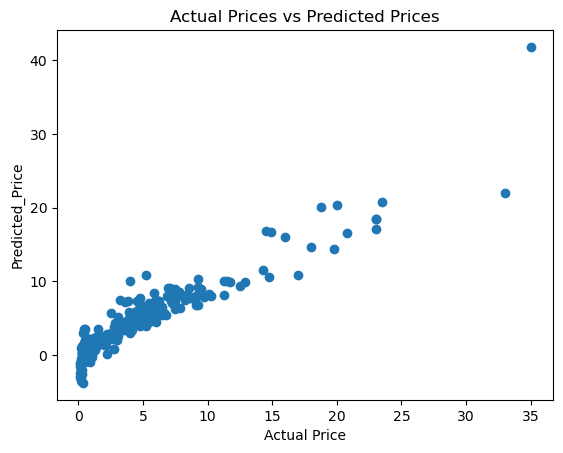

In [51]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted_Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [52]:
# prediction on Test Data
test_data_prediction=lin_reg_model.predict(X_test)

In [54]:
#R squared Error
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R squared Error: " ,error_score)

R squared Error:  0.836576671502687


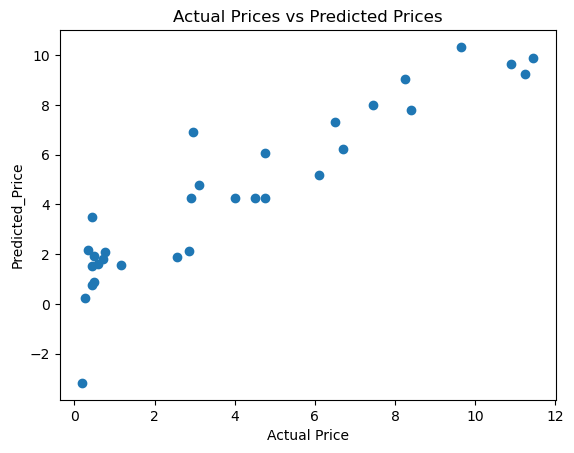

In [55]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted_Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

 2.Lasso Regression

In [56]:
#loading Lasso Regression model
lass_reg_model=Lasso()

In [57]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

*Model Evaluation*

In [59]:
#predicting on training data set
training_data_prediction=lass_reg_model.predict(X_train)

In [60]:
#R squared Error
error_score=metrics.r2_score(Y_train,training_data_prediction)
print("R squared error :" , error_score)

R squared error : 0.8427856123435794


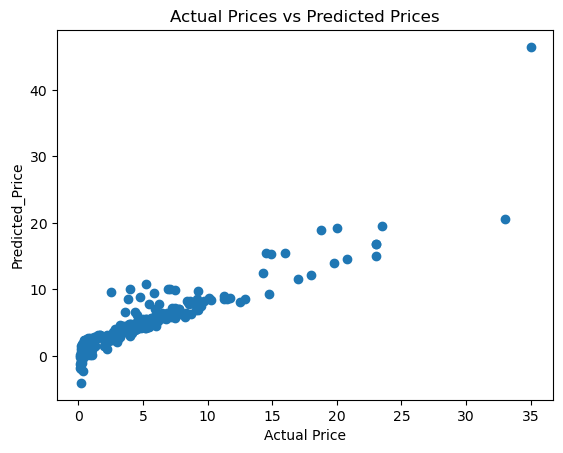

In [61]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted_Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [63]:
# prediction on Test Data
test_data_prediction=lass_reg_model.predict(X_test)

In [65]:
#R squared error
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R squared error :" , error_score)

R squared error : 0.8709167941173195


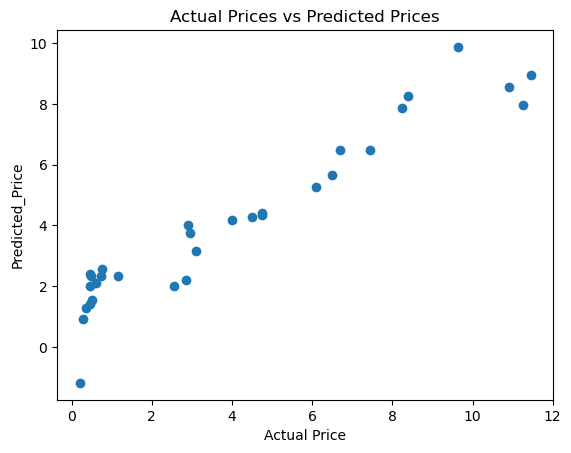

In [66]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted_Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()